<a href="https://colab.research.google.com/github/KESHAVNATH8/Machine-Learning-Project/blob/main/Classification_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [5]:
df = pd.read_csv('/content/DigitalAd_dataset[2].csv')

In [6]:
df

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1
...,...,...,...
395,35,65000,0
396,26,80000,0
397,26,52000,0
398,20,86000,0


In [7]:
df.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [8]:
df.tail()

,Age,Salary,Status
395,35,65000,0
396,26,80000,0
397,26,52000,0
398,20,86000,0
399,32,18000,0


In [9]:
df.Age

0      18
1      29
2      47
3      45
4      46
       ..
395    35
396    26
397    26
398    20
399    32
Name: Age, Length: 400, dtype: int64

In [11]:
df.columns

Index(['Age', 'Salary', 'Status'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     400 non-null    int64
 1   Salary  400 non-null    int64
 2   Status  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [13]:
df.describe

<bound method NDFrame.describe of      Age  Salary  Status
0     18   82000       0
1     29   80000       0
2     47   25000       1
3     45   26000       1
4     46   28000       1
..   ...     ...     ...
395   35   65000       0
396   26   80000       0
397   26   52000       0
398   20   86000       0
399   32   18000       0

[400 rows x 3 columns]>

In [15]:
df.isnull().sum()

Age       0
Salary    0
Status    0
dtype: int64

In [16]:
x = df.iloc[:,:-1]
x

,Age,Salary
0,18,82000
1,29,80000
2,47,25000
3,45,26000
4,46,28000
...,...,...
395,35,65000
396,26,80000
397,26,52000
398,20,86000


In [17]:
y= df['Status']

In [18]:
y

0      0
1      0
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Status, Length: 400, dtype: int64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [20]:
x_train.shape

(320, 2)

In [21]:
x_test.shape

(80, 2)

In [33]:
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test  =sc.transform(x_test)
     

In [34]:
model = LogisticRegression()

In [35]:
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(x_test)

#CONFUSION MATRIX

In [37]:
cm = confusion_matrix(y_test,y_pred)

In [38]:
print("confusion matrix:")
print(cm)

confusion matrix:
[[48  1]
 [16 15]]


#ACCURACY PARADOX

In [39]:
print("accuracy of the model.{0}%".format(accuracy_score(y_test,y_pred)*100))

accuracy of the model.78.75%


#Cross validation score

In [48]:
kfold = KFold(n_splits=10)
result = cross_val_score(model,x,y,cv=kfold)
print("cross validation score: %.2f%%"% (result.mean()*100))

cross validation score: 64.25%


#Stratified K-fold cross validation

In [57]:
skfold = StratifiedKFold(n_splits=3)
model_skfold = LogisticRegression()
results_skfold = cross_val_score(model_skfold,x,y,cv=skfold)
print("cross validation score: %.2f%%"% (results_skfold.mean()*100))

cross validation score: 64.50%


#CAP CURVE

31


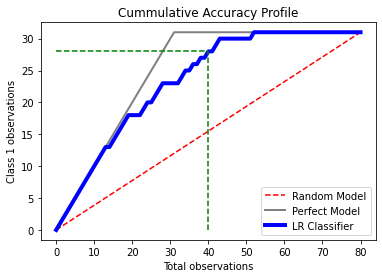

In [67]:
total = len(y_test)
class_1_count = np.sum(y_test)
print(class_1_count)
class_0_count = total - class_1_count
plt.plot([0,total],[0,class_1_count],c='r',linestyle='--',label="Random Model")

plt.plot([0,class_1_count,total],
         [0,class_1_count,class_1_count],
         c = 'grey',
         linewidth = 2,
         label = 'Perfect Model')
probs = model.predict_proba(x_test)
probs = probs[:,1]
model_y = [ y for _, y in sorted(zip(probs,y_test), reverse = True)]
x_values = np.arange(0, total + 1)
y_values = np.append([0], np.cumsum(model_y))

plt.plot(x_values,
        y_values,
        c='b',
        label = 'LR Classifier',
        linewidth = 4)

index = int((50*total / 100))

plt.plot([index, index], [0, y_values[index]], c='g', linestyle='--')

plt.plot([0,index],[y_values[index], y_values[index]],c='g', linestyle='--')
plt.title('Cummulative Accuracy Profile')
plt.xlabel('Total observations')
plt.ylabel('Class 1 observations')
plt.legend(loc = 'lower right')

#Receiver operating curve

No skill: ROC AUC=50.000
Logistic skill: ROC AUC=91.705


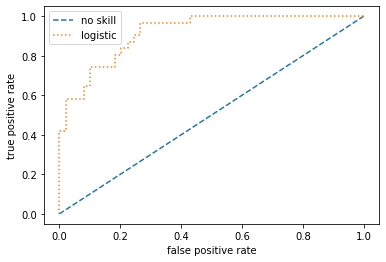

In [72]:
from sklearn.metrics._plot.roc_curve import roc_curve

nsprobability = [0 for _ in range(len(y_test))]
Isprobability = model.predict_proba(x_test)

Isprobability = Isprobability[:,1]

nsauc = roc_auc_score(y_test, nsprobability)
Irauc = roc_auc_score(y_test, Isprobability)

print('No skill: ROC AUC=%.3f' %(nsauc*100))
print('Logistic skill: ROC AUC=%.3f' %(Irauc*100))

nsFP, nsTP, _ = roc_curve(y_test,nsprobability)
lrFP, lrTP, _ = roc_curve(y_test,Isprobability)
plt.plot(nsFP,nsTP, linestyle='--', label='no skill')
plt.plot(lrFP,lrTP, linestyle=':',label='logistic')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()